In [72]:
"""
Statement        : Build a machine learning model to predict salary based on experience for a given dataset
DataSet          : https://drive.google.com/open?id=1UAbkc53H9fpJiEKCUICw1kXsrCdc0uU1
Solution         : Regression, Simple Linear Regression to Predict Salary input Experience 

"""

import pandas as pd # Data Frames or Tables
import numpy as np  # numerical operation

Salarydata=pd.read_csv('Salary_Data.csv') # read data form it location 

# About Salary data  
print(Salarydata.head(),'\n')      # top five Salarydata
print(Salarydata.tail(),'\n')      # Last five values
print(Salarydata.isnull().any(),'\n')    # is any empty values
print(Salarydata.describe(),'\n')  # descride about numerical columes like count, mean, median, mode, max, min etc,.
print(Salarydata.shape,'\n')       # Shape of data 
# print(Salarydata.corr())   


   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0 

    YearsExperience    Salary
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0 

YearsExperience    False
Salary             False
dtype: bool 

       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000 

(30, 2) 

                 YearsExperience    Salary
YearsExperience         1.000000  0.978242
Salary                  0.978242  1.000000


In [74]:
col=['YearsExperience','Salary']
for item in col:
    print(item.lower(),":-")
    print(Salarydata[item].value_counts(),"\n")

yearsexperience :-
4.0     2
3.2     2
9.6     1
6.8     1
2.0     1
3.0     1
4.5     1
6.0     1
9.0     1
9.5     1
10.5    1
5.9     1
8.7     1
3.7     1
4.1     1
5.1     1
2.2     1
7.1     1
8.2     1
7.9     1
2.9     1
1.3     1
10.3    1
3.9     1
1.1     1
5.3     1
4.9     1
1.5     1
Name: YearsExperience, dtype: int64 

salary :-
109431.0    1
37731.0     1
56957.0     1
57081.0     1
63218.0     1
91738.0     1
98273.0     1
46205.0     1
60150.0     1
105582.0    1
122391.0    1
64445.0     1
121872.0    1
112635.0    1
93940.0     1
39891.0     1
81363.0     1
57189.0     1
61111.0     1
56642.0     1
43525.0     1
101302.0    1
66029.0     1
55794.0     1
54445.0     1
39343.0     1
116969.0    1
67938.0     1
113812.0    1
83088.0     1
Name: Salary, dtype: int64 



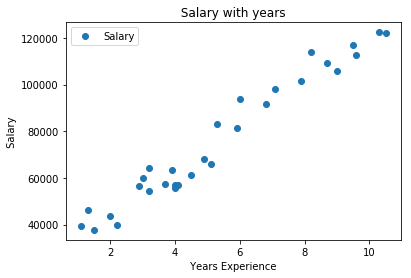

In [16]:
import matplotlib.pyplot as plt

Salarydata.plot(x='YearsExperience', y='Salary', style='o')
plt.title(" Salary with years ")
plt.xlabel(" Years Experience ")
plt.ylabel(" Salary ")
plt.show()


In [21]:
from sklearn.model_selection import train_test_split # Split the data for training and spliting

x=Salarydata['YearsExperience'].values.reshape(-1,1)
y=Salarydata['Salary'].values.reshape(-1,1)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0)



In [52]:
from sklearn.linear_model import LinearRegression

regressor=LinearRegression()
regressor.fit(x_train,y_train) # Salary data is trained with Linear Regression

print(regressor.intercept_) # value of intercept
print(regressor.coef_)      # value of sllop

# Compare actual value and prediction valuers

ypred=regressor.predict(x_test)
compareValues=pd.DataFrame({'actualValues':y_test.flatten(),'Predicted':ypred.flatten()})
print(compareValues)


# Manual Prediction
newValue=regressor.predict([[float(input("Eneter number of years to experience : "))]])  # if a ma
print("\n Number of years Experience Prediction of Salary : ",newValue)


[26780.09915063]
[[9312.57512673]]
   actualValues      Predicted
0       37731.0   40748.961841
1      122391.0  122699.622956
2       57081.0   64961.657170
3       63218.0   63099.142145
4      116969.0  115249.562855
5      109431.0  107799.502753
Eneter number of years to experience : 22

 Number of years Experience Prediction of Salary :  [[231656.75193867]]


In [71]:
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix
#result=confusion_matrix(x_train,y_train)
print("Linear regressor performance:")
#print("Confusion Matrix : ",result)
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, ypred), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_test, ypred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, ypred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, ypred), 2))
print("R2 score =", round(sm.r2_score(y_test, ypred), 2))

# Perform prediction on train data, reuse
ypred1 = regressor.predict(x_test)
print("\nNew mean absolute error =", round(sm.r2_score(y_test, ypred1), 2))

Linear regressor performance:
Mean absolute error = 2446.17
Mean squared error = 12823412.3
Median absolute error = 1675.47
Explain variance score = 0.99
R2 score = 0.99

New mean absolute error = 0.99


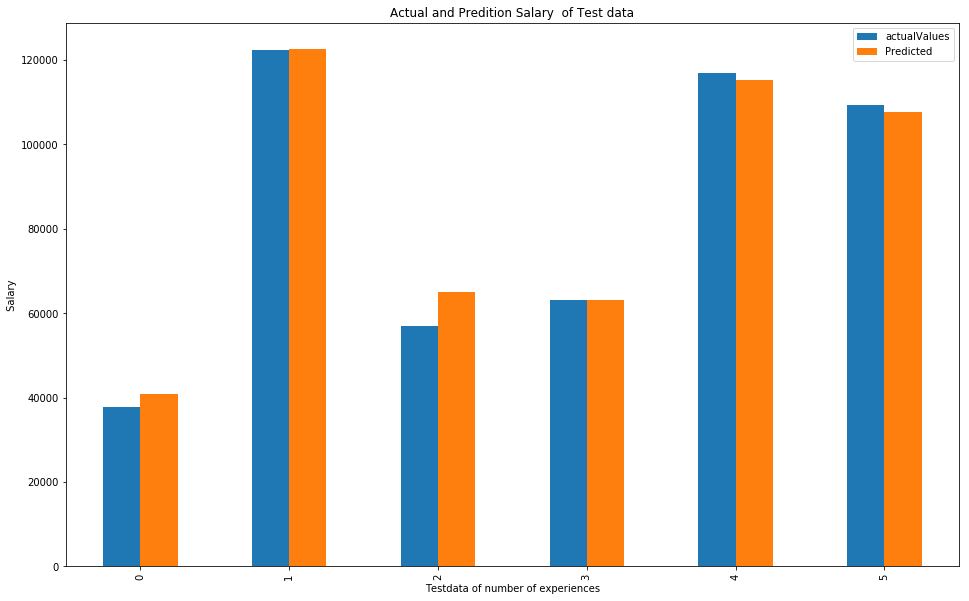

In [56]:
compareValues.plot(kind='bar',figsize=(16,10))
plt.title("Actual and Predition Salary  of Test data")
plt.xlabel('Testdata of number of experiences')
plt.ylabel(' Salary ')
plt.show()